-----------------------------------------------------------------------------------------------------------
Vizualizari Avansate
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

-----------------------------------------------------------------------------------------------------------
1.	Creați următoarele vizualizări:

◦	Distribuția punctajelor (points): Folosiți un histogramă

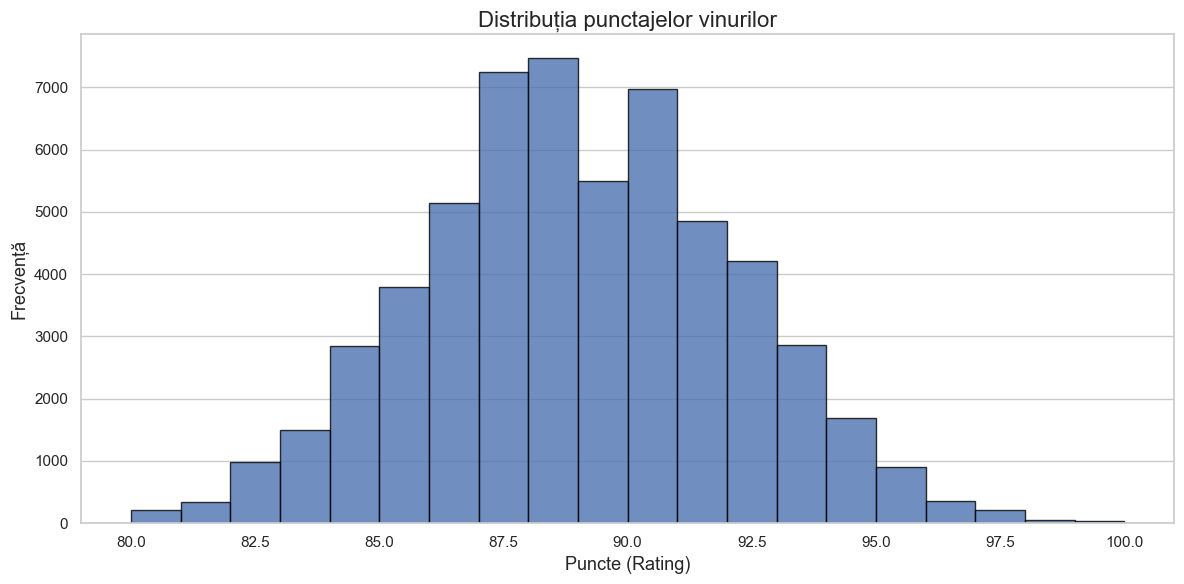

In [38]:
df = pd.read_csv("wine_clean_final.csv")


#sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))

plt.hist(
    df["points"].dropna(),
    bins=20,
    edgecolor="black",
    alpha=0.8
)

plt.title("Distribuția punctajelor vinurilor", fontsize=16)
plt.xlabel("Puncte (Rating)", fontsize=13)
plt.ylabel("Frecvență", fontsize=13)
# plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5)
plt.grid(axis='x')

plt.tight_layout()
plt.show()

In [3]:
df['points'].describe()

count    57198.000000
mean        88.515612
std          3.146780
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

◦	Prețurile medii pe țară (country): Folosiți un bar plot

C:\Users\Admin\AppData\Local\Temp\ipykernel_10524\1032338781.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




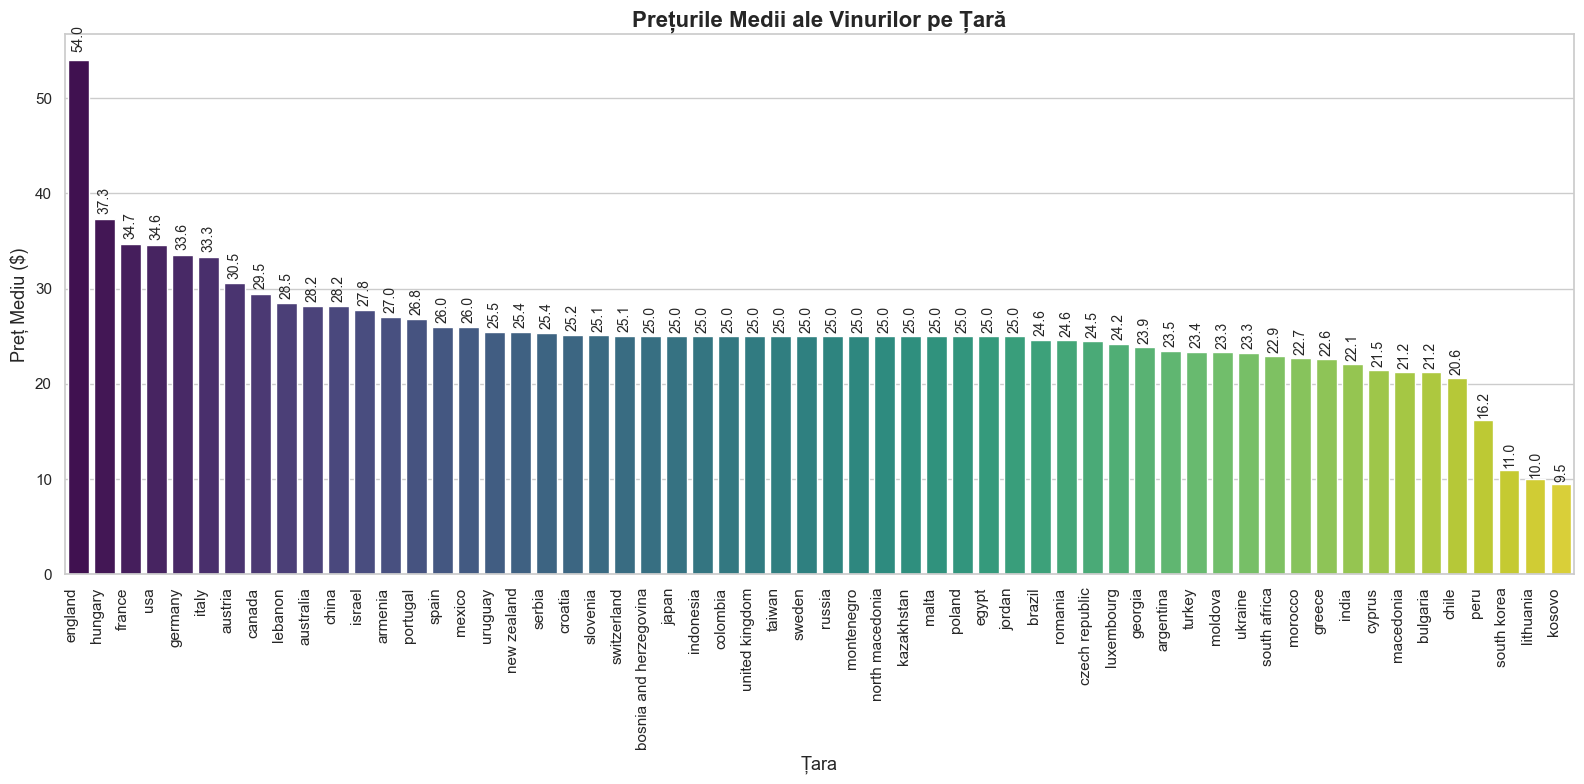

In [39]:
df = pd.read_csv('wine_clean_final.csv')

sns.set_theme(style="whitegrid")

mean_price_country = (
    df.groupby('country')['price']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x=mean_price_country.index,
    y=mean_price_country.values,
    palette="viridis"
)

plt.title("Prețurile Medii ale Vinurilor pe Țară", fontsize=16, fontweight='bold')
plt.xlabel("Țara", fontsize=13)
plt.ylabel("Preț Mediu ($)", fontsize=13)
plt.xticks(rotation=90, ha='right')


for i, value in enumerate(mean_price_country.values):
    ax.text(
        i,
        value + (value * 0.015),
        f"{value:.1f}",
        ha='center',
        va='bottom',
        fontsize=10,
        rotation=90
    )

plt.tight_layout()
plt.show()


◦	Distribuția vinurilor după categorii și regiuni: Folosiți un stacked bar chart

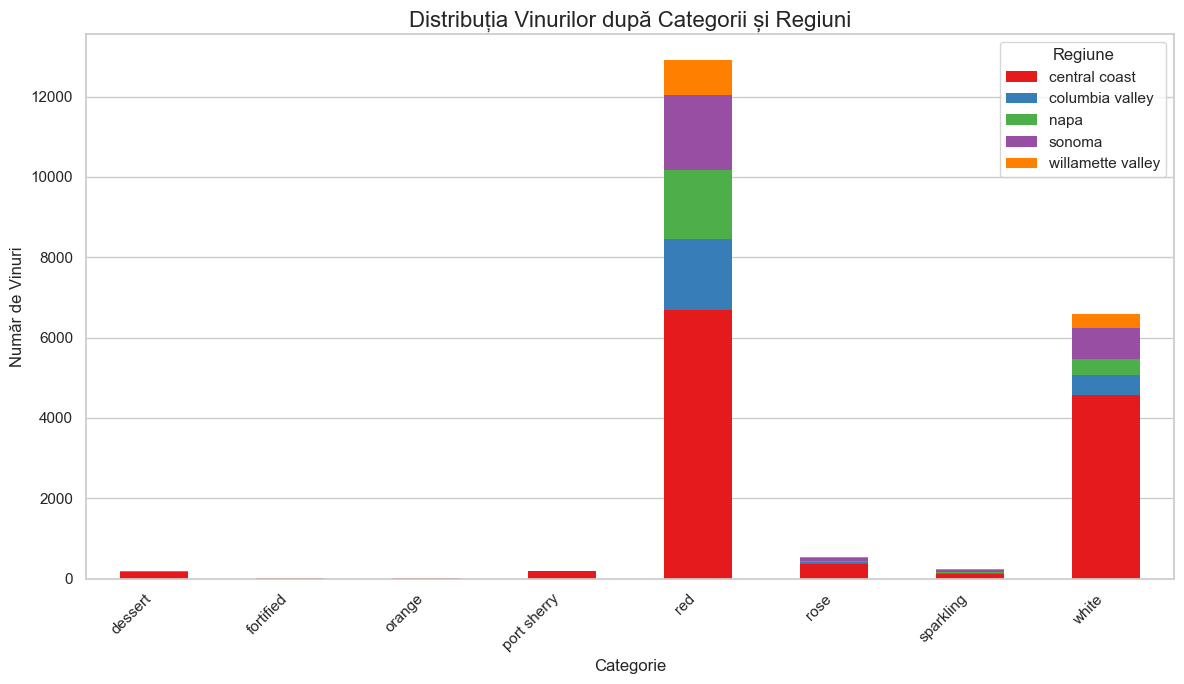

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_clean_final.csv')

top_regions = df['region_1'].value_counts().head(5).index
filtered = df[df['region_1'].isin(top_regions)]

pivot_table = filtered.pivot_table(
    index='category',
    columns='region_1',
    aggfunc='size',
    fill_value=0
)

pivot_table.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=sns.color_palette("Set1"),
    edgecolor='none'
)

plt.title("Distribuția Vinurilor după Categorii și Regiuni", fontsize=16)
plt.xlabel("Categorie")
plt.ylabel("Număr de Vinuri")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Regiune")
plt.tight_layout()

plt.grid(axis='x')

plt.show()

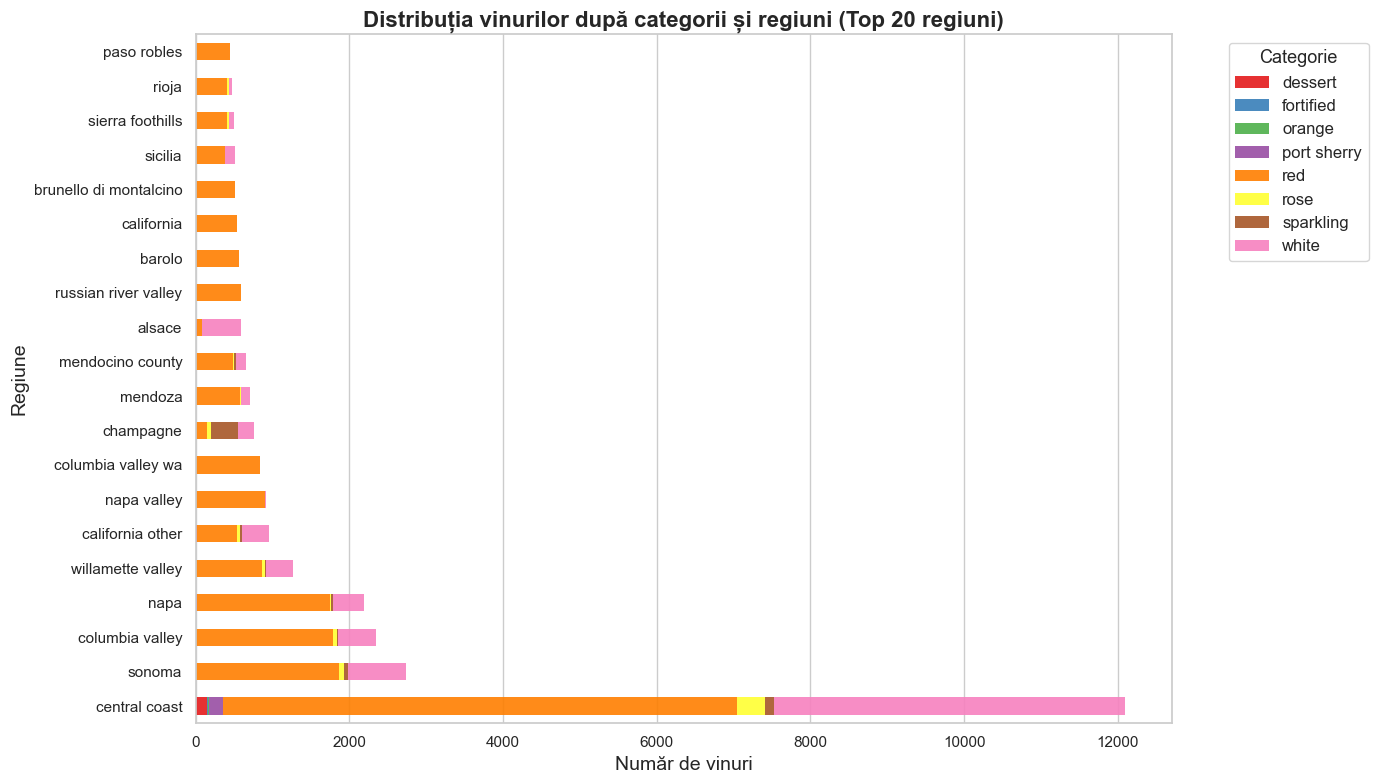

In [41]:
df = pd.read_csv("wine_clean_final.csv")
df = df.dropna(subset=['category', 'region_1'])

# Contăm vinurile pe regiune și categorie
counts = df.groupby(['region_1', 'category']).size().unstack(fill_value=0)

# Selectăm top 20 regiuni
top_regions = counts.sum(axis=1).sort_values(ascending=False).head(20).index
counts_top = counts.loc[top_regions]

# Stil Seaborn
# sns.set_theme(style="whitegrid")

# Culori Set2
colors = sns.color_palette("Set1", n_colors=len(counts_top.columns))

# Stacked bar chart orizontal fără separatori
ax = counts_top.plot(
    kind='barh',
    stacked=True,
    figsize=(14,8),
    alpha=0.9,
    color=colors,
    edgecolor=None,   # fără contur
    linewidth=0       # fără linie între segmente
)

# Titlu și etichete
plt.title("Distribuția vinurilor după categorii și regiuni (Top 20 regiuni)", fontsize=16, weight='bold')
plt.xlabel("Număr de vinuri", fontsize=14)
plt.ylabel("Regiune", fontsize=14)

# Legendă
plt.legend(title="Categorie", fontsize=12, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y')

plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------------------------------------
2.	Generați un scatter plot interactiv care să arate relația dintre price și points, colorat în funcție de category

In [37]:
df = pd.read_csv("wine_clean_final.csv")

df = df.dropna(subset=['price', 'points', 'category', 'price_quality_ratio'])
df = df[df['price'] > 0]

# Paleta Set2 de la Seaborn
categories = df['category'].unique()
palette = sns.color_palette("Set1", n_colors=len(categories))
palette_hex = [f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}' for r,g,b in palette]

# Scatter plot interactiv
fig = px.scatter(
    df,
    x='price',
    y='points',
    color='category',
    # size='price_quality_ratio',     
    hover_data=['country', 'region_1', 'variety', 'winery', 'vintage', 'price_quality_ratio'],
    color_discrete_sequence=palette_hex,
    #opacity=0.7,
    labels={'price': 'Preț ($)', 'points': 'Punctaj'},
    title='Relația dintre Preț și Punctajul vinurilor',
    template='plotly_white',
    height=800,
    width=1200
)

# Blocăm axa X să nu fie negativă
# fig.update_xaxes(range=[0, df['price'].max()+5], fixedrange=True)

# Apropiem axa Y
fig.update_yaxes(range=[df['points'].min()-1, df['points'].max()+1])


fig.update_layout(
    legend_title_text='Categorie vin',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    title=dict(font=dict(size=22, family="Arial"))
)
fig.show(renderer="browser")
